In [17]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [18]:
with open("../tracker_stubs/ball_detections.pkl", "rb") as f:
    ball_positions = pickle.load(f)
print(ball_positions[:10])

[{}, {1: [893.1366577148438, 617.3442993164062, 911.4036254882812, 636.9761352539062]}, {}, {}, {}, {}, {1: [821.3460083007812, 687.9659423828125, 838.1300048828125, 705.9591674804688]}, {1: [812.8591918945312, 695.1517333984375, 830.8386840820312, 715.78515625]}, {1: [797.1233520507812, 718.9011840820312, 814.0260009765625, 738.8193969726562]}, {1: [777.1159057617188, 741.0853271484375, 800.5676879882812, 766.9713134765625]}]


In [19]:
ball_positions=[x.get(1,[]) for x in ball_positions]
ball_positions_df=pd.DataFrame(ball_positions,columns=["x1","y1","x2","y2"])
ball_positions_df=ball_positions_df.interpolate()
ball_positions_df=ball_positions_df.bfill()

In [20]:
ball_positions_df.head()

,x1,y1,x2,y2
0,893.136658,617.344299,911.403625,636.976135
1,893.136658,617.344299,911.403625,636.976135
2,878.778528,631.468628,896.748901,650.772742
3,864.420398,645.592957,882.094177,664.569348
4,850.062268,659.717285,867.439453,678.365955


In [21]:
ball_positions_df["mid_y"]=(ball_positions_df["y1"]+ball_positions_df["y2"])/2
ball_positions_df.head()

,x1,y1,x2,y2,mid_y
0,893.136658,617.344299,911.403625,636.976135,627.160217
1,893.136658,617.344299,911.403625,636.976135,627.160217
2,878.778528,631.468628,896.748901,650.772742,641.120685
3,864.420398,645.592957,882.094177,664.569348,655.081152
4,850.062268,659.717285,867.439453,678.365955,669.041620


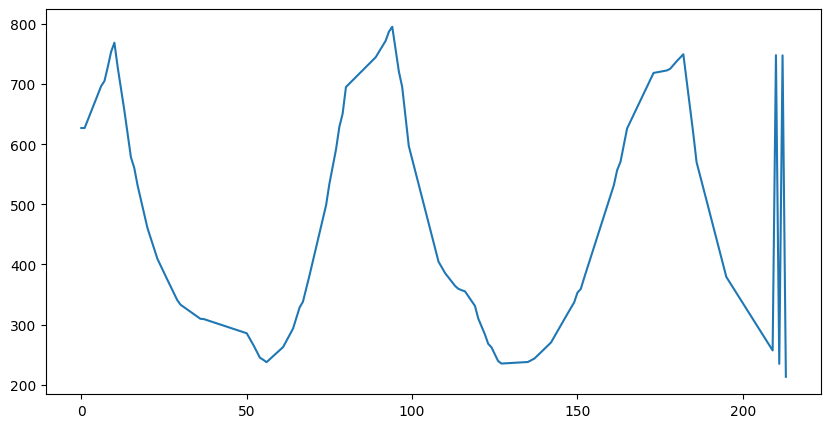

In [22]:
plt.figure(figsize=(10,5))
ball_positions_df["mid_y"].plot()
plt.show()

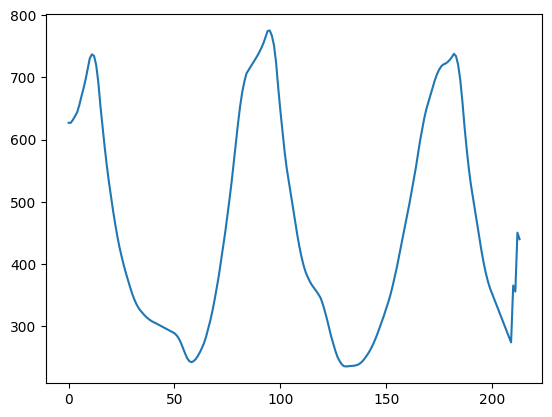

In [23]:
ball_positions_df["mid_y_rolling"]=ball_positions_df["mid_y"].rolling(window=5,min_periods=1,center=False).mean()
ball_positions_df["mid_y_rolling"].plot()
plt.show()

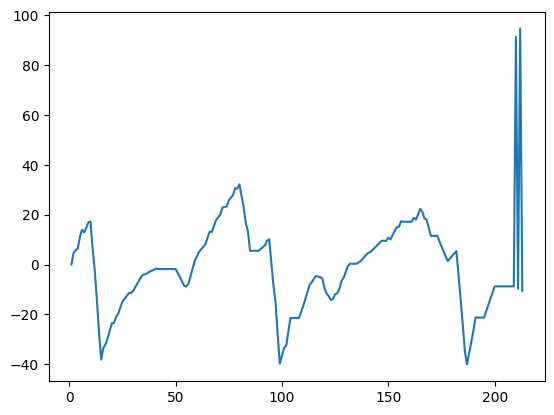

In [24]:
ball_positions_df["delta_y"]=ball_positions_df["mid_y_rolling"].diff()
ball_positions_df["delta_y"].plot()
plt.show()

In [25]:
c
ball_positions_df.head()

,x1,y1,x2,y2,mid_y,mid_y_rolling,delta_y,ball_hit
0,893.136658,617.344299,911.403625,636.976135,627.160217,627.160217,NaN,0
1,893.136658,617.344299,911.403625,636.976135,627.160217,627.160217,0.000000,0
2,878.778528,631.468628,896.748901,650.772742,641.120685,631.813706,4.653489,0
3,864.420398,645.592957,882.094177,664.569348,655.081152,637.630568,5.816861,0
4,850.062268,659.717285,867.439453,678.365955,669.041620,643.912778,6.282210,0


In [26]:
ball_positions_df["delta_y"].iloc[11]
ball_positions_df["delta_y"].iloc[12]

np.float64(-2.6139434814452898)

In [27]:
minimum_frame=25
for i in range(1,len(ball_positions_df)-int(minimum_frame*1.2)):
    negative_position_change=ball_positions_df["delta_y"].iloc[i]>0 and ball_positions_df["delta_y"].iloc[i+1]<0
    positive_position_change=ball_positions_df["delta_y"].iloc[i]<0 and ball_positions_df["delta_y"].iloc[i+1]>0
    if negative_position_change or positive_position_change:
        count=0
        for change_frame in range(i+1,int(i+minimum_frame*1.2) +1):

            negative_position_change_following_frame=ball_positions_df["delta_y"].iloc[i]>0and ball_positions_df["delta_y"].iloc[change_frame]<0
            positive_position_change_following_frame=ball_positions_df["delta_y"].iloc[i]<0and ball_positions_df["delta_y"].iloc[change_frame]>0
            if negative_position_change_following_frame and negative_position_change:
                count+=1
            elif positive_position_change_following_frame and positive_position_change:
                count+=1
        if count>minimum_frame-1:
            ball_positions_df["ball_hit"].iloc[i]=1






C:\Users\d\AppData\Local\Temp\ipykernel_14928\4285399856.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ball_positions_df["ball_hit"].iloc[i]=1
C:\Users\d\AppData\Local\Temp\ipykernel_14928\4285399856.py:16: SettingWithCopyWarning: 
A 

In [30]:
ball_hit_frame=ball_positions_df[ball_positions_df["ball_hit"]==1]
ball_hit_frame

,x1,y1,x2,y2,mid_y,mid_y_rolling,delta_y,ball_hit
11,777.939331,717.951843,796.907227,738.314270,728.133057,737.126501,6.234100,1
58,926.175256,241.236475,938.221765,253.595041,247.415758,242.638125,-1.599107,1
95,623.688629,749.008301,641.831573,767.926331,758.467316,775.462299,0.867975,1
131,717.677948,230.119804,729.704773,242.572395,236.346100,235.697563,-0.589441,1
182,1295.454468,740.952942,1312.696411,758.875305,749.914124,737.992087,5.389600,1
